# Importing

In [1]:
#Importing
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Folder path 
path = r'/Users/crystalosuna/Documents/05-2023 Instacart Basket Analysis'

In [3]:
#import merged dataset
ords_prods_merge= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ready_merged.pkl'))

# Create a Crosstab

In [4]:
#creating a crosstab
crosstab = pd.crosstab(ords_prods_merge['days_since_prior_order'], ords_prods_merge['order_number'], dropna = False)

In [5]:
crosstab.to_clipboard()

# Customer Profiling

In [6]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,Number_of_Dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
ords_prods_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'Number_of_Dependants', 'marital_status',
       'income'],
      dtype='object')

In [8]:
#dropping PII columns
ords_prods_merge= ords_prods_merge.drop(columns = ['first_name', 'last_name'])

In [9]:
#check the output
ords_prods_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'Number_of_Dependants', 'marital_status', 'income'],
      dtype='object')

In [10]:
ords_prods_merge.shape

(32404859, 31)

# Create regional segmentation

In [11]:
#create an emty list to create a 'region' column
region = []

In [12]:
#check names of states 
ords_prods_merge['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [13]:
# Filling the list with regions 'Northeast', 'Midwest', 'South', and 'West'

for value in ords_prods_merge['state']:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append('Midwest')
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [14]:
#check list
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [15]:
#Combine 'Region' with ords_prods_merge
ords_prods_merge['region'] = region

In [16]:
#Checking the frequency distribution
ords_prods_merge['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

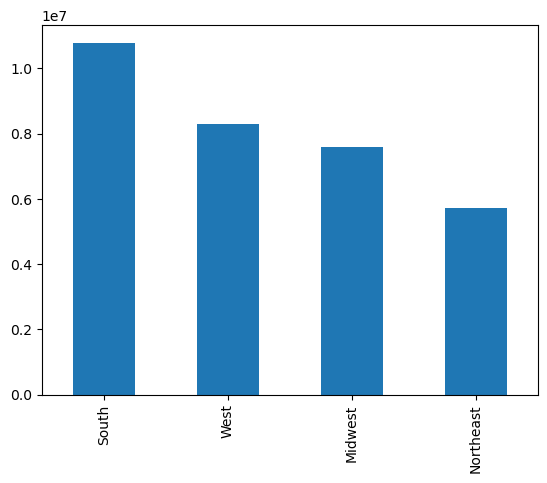

In [20]:
# Creating a bar chart

customers_region_bar = ords_prods_merge['region'].value_counts(dropna = False).plot.bar()

In [21]:
#Exporting the customers_region_bar
customers_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_region_bar.png'))

In [22]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_prior_orders,order_frequency_flag,gender,state,age,date_joined,Number_of_Dependants,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [23]:
ords_prods_merge.shape

(32404859, 32)

# Spending habits between regions

In [24]:
#Create crosstab between 'region' and 'spending_flag'
crosstab_region_spending = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['spending_flag'], dropna = False) 

In [25]:
#check crosstab
crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,29240,7568085
Northeast,18622,5704114
South,40396,10751489
West,31211,8261702


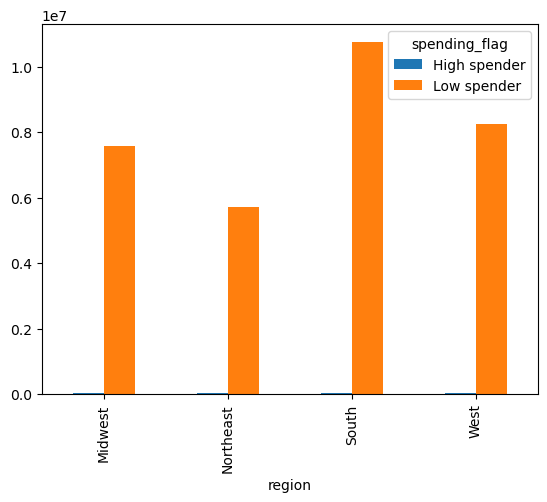

In [26]:
#Create a bar chart
region_spending_bar = crosstab_region_spending.plot.bar()

In [27]:
#Export the region_spending_bar
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar.png'))

# Create a exclusion flag

In [28]:
#create a exclusion flag on low-activity customers
ords_prods_merge.loc[ords_prods_merge['max_order'] < 5, 'low_order_flag'] = 'low-activity customer'

In [29]:
ords_prods_merge.loc[ords_prods_merge['max_order'] >= 5, 'low_order_flag'] = 'high-activity customer'

In [30]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,Number_of_Dependants,marital_status,income,region,low_order_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer


In [31]:
#check frequency distribution
ords_prods_merge['low_order_flag'].value_counts(dropna = False)

high-activity customer    30964564
low-activity customer      1440295
Name: low_order_flag, dtype: int64

Create a sample with only high activity customers

In [32]:
#create a sample with only high-activity customers
high_activity_customers= ords_prods_merge[ords_prods_merge['low_order_flag'] == 'high-activity customer']

In [33]:
#check
high_activity_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,Number_of_Dependants,marital_status,income,region,low_order_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity customer


In [35]:
# Exporting the sample of high_activity customers
high_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merged_high_activity_customers.pkl'))

# Profiling

Age Profile

In [36]:
#create an age profile

ords_prods_merge.loc[ords_prods_merge['age'] <= 40, 'age_profile'] = 'young'

In [38]:
ords_prods_merge.loc[((ords_prods_merge['age'] > 40) & (ords_prods_merge['age'] < 65)), 'age_profile'] = 'middle-aged'

In [39]:
ords_prods_merge.loc[ords_prods_merge['age'] >= 65, 'age_profile'] = 'senior'

In [40]:
# Check 
ords_prods_merge['age_profile'].value_counts(dropna = False)

middle-aged    12159729
young          11670046
senior          8575084
Name: age_profile, dtype: int64

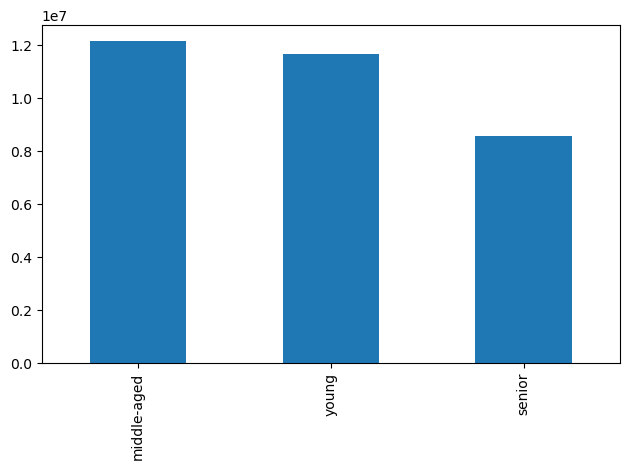

In [41]:
#Create a bar chart of age profile
bar_age_profile = ords_prods_merge['age_profile'].value_counts().plot.bar()
plt.tight_layout()

In [42]:
#Export the bar
bar_age_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

Income Profile

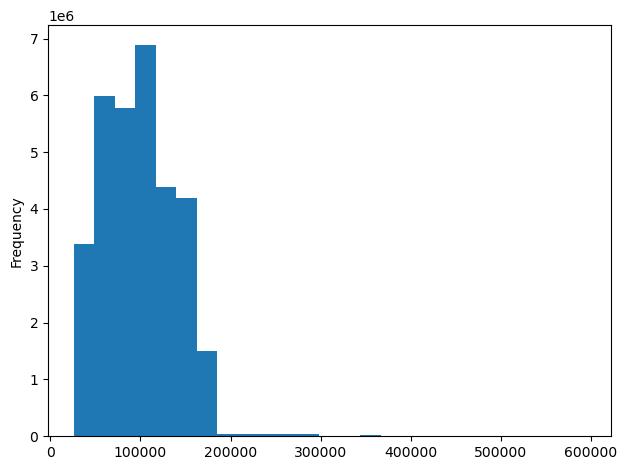

In [43]:
#create income histogram 
hist_income = ords_prods_merge['income'].plot.hist(bins = 25)
plt.tight_layout()

In [44]:
#Export the histogram
hist_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_income.png'))

In [45]:
#Create an income profile
ords_prods_merge.loc[ords_prods_merge['income'] < 75000, 'income_profile'] = 'low income'

In [46]:
ords_prods_merge.loc[(ords_prods_merge['income'] >= 75000) & (ords_prods_merge['income'] < 125000), 'income_profile'] = 'mid income'

In [47]:
ords_prods_merge.loc[ords_prods_merge['income'] >= 125000, 'income_profile'] = 'high income'

In [48]:
#check
ords_prods_merge['income_profile'].value_counts(dropna = False)

mid income     13331136
low income     10442766
high income     8630957
Name: income_profile, dtype: int64

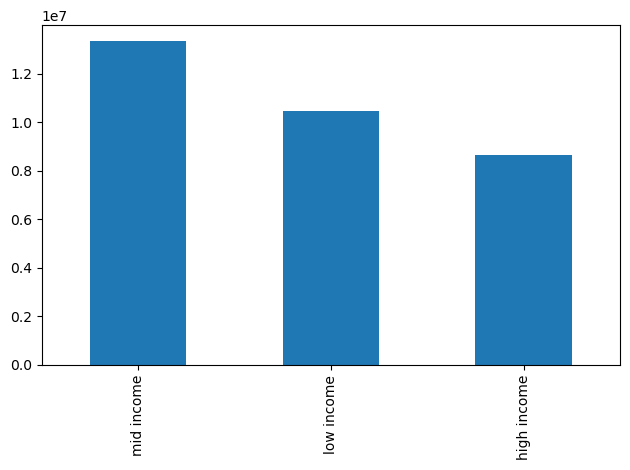

In [49]:
#Create a bar chart for income profile
bar_income_profile = ords_prods_merge['income_profile'].value_counts().plot.bar()
plt.tight_layout()

In [50]:
#Export bar 
bar_income_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_profile.png'))

Diet Profile

In [51]:
#Create a diet profile by creating a crosstab
department_user_crosstab = pd.crosstab(ords_prods_merge['department_id'], ords_prods_merge['user_id'], dropna = False)

In [52]:
#Create diet flags with crosstab and store in dictionay
diet_dict = dict()
for user in department_user_crosstab:
    diet_list = department_user_crosstab[user].tolist()
    if diet_list[11] == 0 and diet_list[15] == 0:
        diet_dict[user] = 'Vegan'
    elif diet_list[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Non-vegetarian'

In [54]:
#Adding the flags to the list
diet_flag = []
for user in ords_prods_merge['user_id']:
    diet_flag.append(diet_dict[user])

In [55]:
#Adding the flag values to 'ords_prods_merge'
ords_prods_merge['diet'] = diet_flag

In [56]:
#Check
ords_prods_merge['diet'].value_counts(dropna = False)

Non-vegetarian    23762619
Vegetarian         8258813
Vegan               383427
Name: diet, dtype: int64

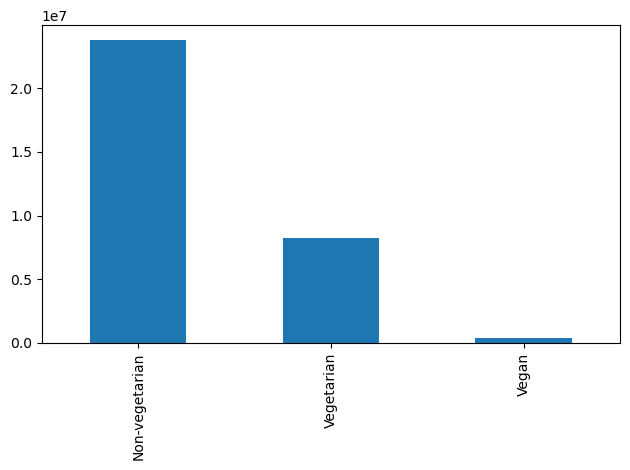

In [58]:
#Create a bar chart for diet profile
bar_diet_profile = ords_prods_merge['diet'].value_counts().plot.bar()
plt.tight_layout()

In [59]:
#Export bar
bar_diet_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_profile.png'))

Pet Owners

In [60]:
#Create pet flags with crosstab and store in dictionary

pet_dict = dict()
for user in department_user_crosstab:
    workinglist = department_user_crosstab[user].tolist()
    if workinglist[7] == 0 :     
        pet_dict[user] = 'No pet'
    else:
        pet_dict[user] = 'Owns a pet'

In [61]:
#Adding the flags to the list
pet_flag = []
for user in ords_prods_merge['user_id']:
    pet_flag.append(pet_dict[user])

In [62]:
#Adding pet_flag column to 'ords_prods_merge'
ords_prods_merge['pet_status'] = pet_flag

In [63]:
#Check
ords_prods_merge['pet_status'].value_counts(dropna = False)

No pet        28876718
Owns a pet     3528141
Name: pet_status, dtype: int64

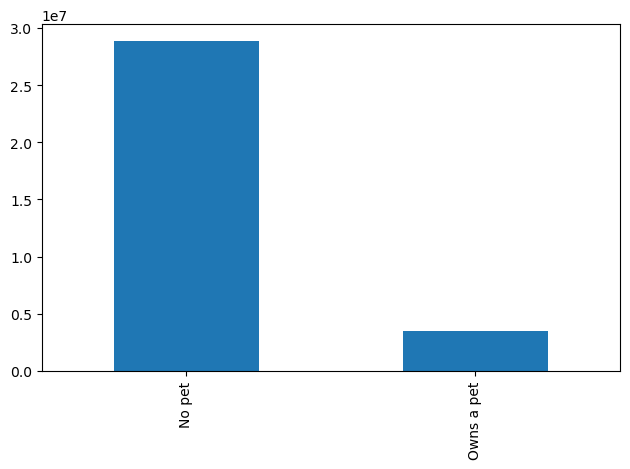

In [64]:
#Create a bar chart for the pet profile
bar_pet_profile = ords_prods_merge['pet_status'].value_counts().plot.bar()
plt.tight_layout()

In [65]:
#Export bar
bar_pet_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pet_profile.png'))

Family Status and Number of Dependants

In [66]:
#See marital status of the customers
ords_prods_merge['marital_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

In [67]:
#Create a crosstab between number_of_dependants and marital_status
family_crosstab = pd.crosstab(ords_prods_merge['marital_status'], ords_prods_merge['Number_of_Dependants'], dropna = False)

In [68]:
family_crosstab

Number_of_Dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


In [69]:
#Family status classification
ords_prods_merge.loc[(ords_prods_merge['Number_of_Dependants'] == 0), 'dependants'] = 'No dependants'

In [70]:
ords_prods_merge.loc[(ords_prods_merge['Number_of_Dependants'] >= 1), 'dependants'] = 'Has dependants'

In [71]:
#Check
ords_prods_merge['dependants'].value_counts(dropna = False)

Has dependants    24307356
No dependants      8097503
Name: dependants, dtype: int64

In [72]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Number_of_Dependants,marital_status,income,region,low_order_flag,age_profile,income_profile,diet,pet_status,dependants
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,South,high-activity customer,young,low income,Vegetarian,No pet,Has dependants
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,South,high-activity customer,young,low income,Vegetarian,No pet,Has dependants
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,South,high-activity customer,young,low income,Vegetarian,No pet,Has dependants
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,South,high-activity customer,young,low income,Vegetarian,No pet,Has dependants
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,South,high-activity customer,young,low income,Vegetarian,No pet,Has dependants


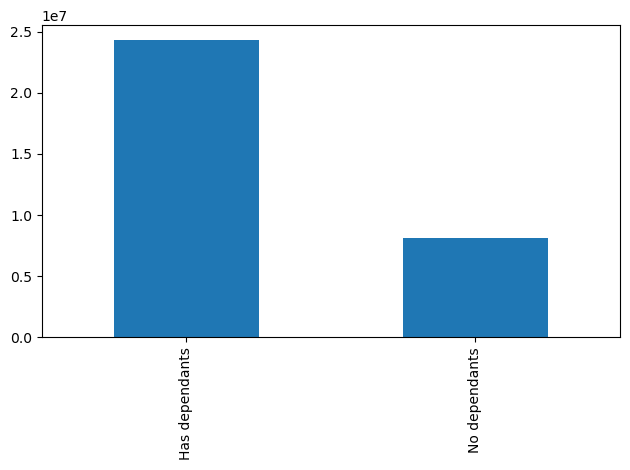

In [73]:
#Create a bar chart for dependants profile
bar_dependants_profile = ords_prods_merge['dependants'].value_counts().plot.bar()
plt.tight_layout()

In [74]:
#Export bar
bar_dependants_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_profile_bar.png'))

Aggregate Customer Profiles

In [75]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [77]:
#Descrptive statistics for age profile
ords_prods_merge.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                              mean   max  min      mean   max  min
age_profile                                                       
middle-aged              11.116537  30.0  0.0  7.791258  25.0  1.0
senior                   11.078641  30.0  0.0  7.796460  25.0  1.0
young                    11.109790  30.0  0.0  7.786476  25.0  1.0

In [78]:
#Descrptive statistics for income profile
ords_prods_merge.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
income_profile                                                       
high income                 11.024073  30.0  0.0  7.957181  25.0  1.0
low income                  11.240514  30.0  0.0  7.434606  25.0  1.0
mid income                  11.049451  30.0  0.0  7.962429  25.0  1.0

In [79]:
# Descrptive statistics for diet profile

ords_prods_merge.groupby('diet').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
diet                                                                 
Non-vegetarian              10.762605  30.0  0.0  7.905866  25.0  1.0
Vegan                       14.749274  30.0  0.0  7.009761  20.0  1.0
Vegetarian                  11.952600  30.0  0.0  7.496434  20.0  1.0

In [80]:
#Descrptive statistics for pet profile
ords_prods_merge.groupby('pet_status').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                             mean   max  min      mean   max  min
pet_status                                                       
No pet                  11.200417  30.0  0.0  7.788272  25.0  1.0
Owns a pet              10.327303  30.0  0.0  7.812532  25.0  1.0

In [81]:
#Descrptive statistics for dependants profile
ords_prods_merge.groupby('dependants').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
dependants                                                           
Has dependants              11.111834  30.0  0.0  7.791250  25.0  1.0
No dependants               11.080806  30.0  0.0  7.789901  25.0  1.0

# Customer profiles by regions

Age by region

In [82]:
#Create a crosstab to compare age profile and region
age_region_crosstab = pd.crosstab(ords_prods_merge['age_profile'], ords_prods_merge['region'], normalize = 'columns')

In [83]:
age_region_crosstab

region,Midwest,Northeast,South,West
age_profile,,,,
middle-aged,0.380661,0.370974,0.371166,0.378535
senior,0.262045,0.271531,0.262814,0.264573
young,0.357294,0.357495,0.366020,0.356892


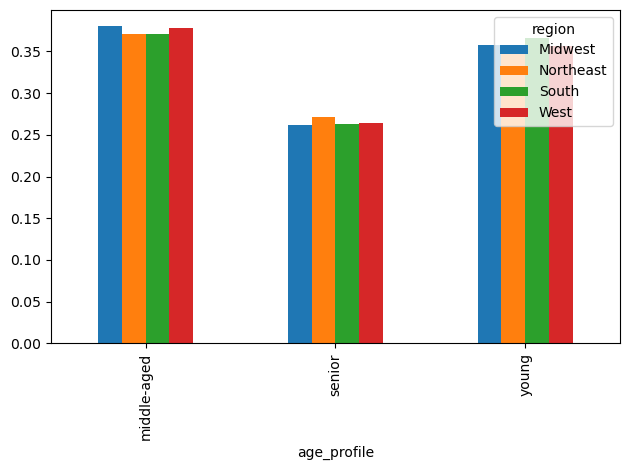

In [85]:
#Create a bar chart of age profile and region
bar_age_region = age_region_crosstab.plot.bar()
plt.tight_layout()

In [86]:
#Export bar
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

Income by region

In [87]:
#Create a crosstab to compare income profile and region
income_region_crosstab = pd.crosstab(ords_prods_merge['income_profile'], ords_prods_merge['region'], normalize = 'columns')

In [88]:
income_region_crosstab

region,Midwest,Northeast,South,West
income_profile,,,,
high income,0.270318,0.268977,0.262824,0.265481
low income,0.319571,0.318405,0.323667,0.325550
mid income,0.410111,0.412618,0.413510,0.408968


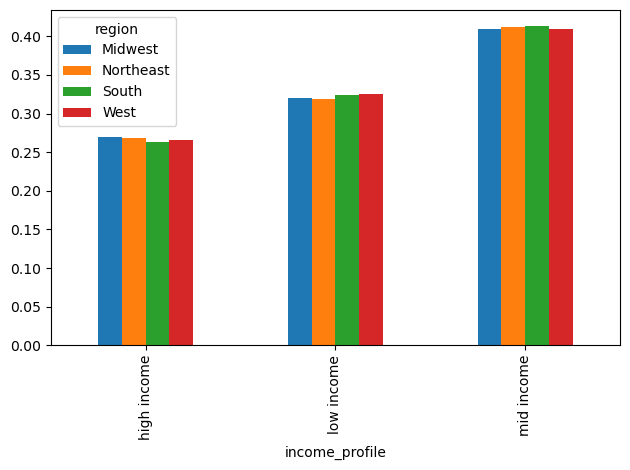

In [90]:
#Create a bar chart of income profile and region
bar_income_region = income_region_crosstab.plot.bar()
plt.tight_layout()

In [91]:
#Export bar
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

Diet by region

In [92]:
#Create a crosstab to compare diet profile and region
diet_region_crosstab = pd.crosstab(ords_prods_merge['diet'], ords_prods_merge['region'], normalize = 'columns')

In [93]:
diet_region_crosstab

region,Midwest,Northeast,South,West
diet,,,,
Non-vegetarian,0.730808,0.734091,0.733396,0.734928
Vegan,0.011885,0.011841,0.011611,0.012066
Vegetarian,0.257307,0.254068,0.254993,0.253005


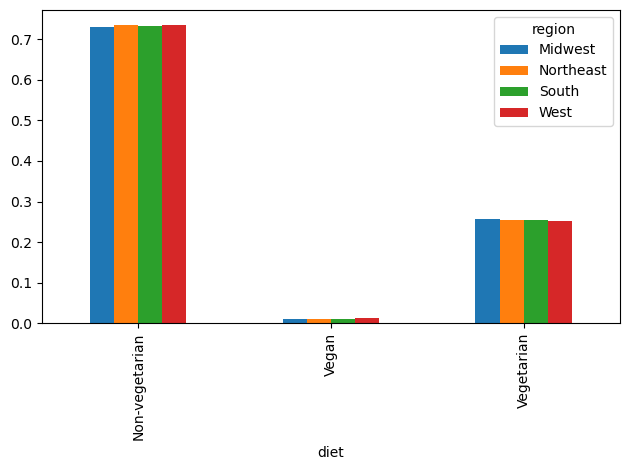

In [94]:
#Create a bar chart of diet profile and region
bar_diet_region = diet_region_crosstab.plot.bar()
plt.tight_layout()

In [95]:
#Export bar
bar_diet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_region_bar.png'))

Pet owners by region

In [96]:
#Create a crosstab to compare pet profile and region
pet_region_crosstab = pd.crosstab(ords_prods_merge['pet_status'], ords_prods_merge['region'], normalize = 'columns')

In [97]:
pet_region_crosstab

region,Midwest,Northeast,South,West
pet_status,,,,
No pet,0.888836,0.892981,0.894204,0.887927
Owns a pet,0.111164,0.107019,0.105796,0.112073


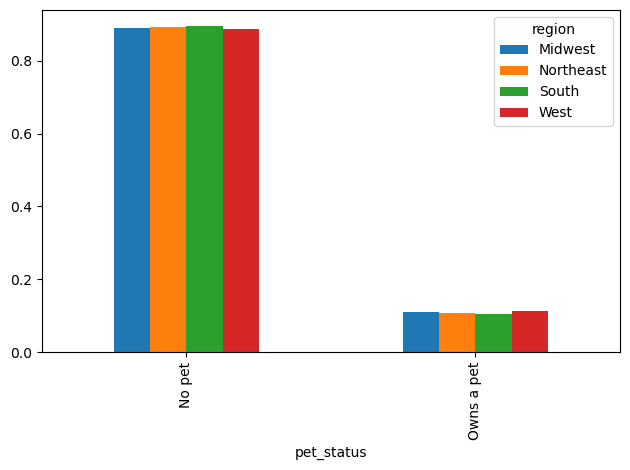

In [98]:
#Create a bar chart of pet profile and region
bar_pet_region = pet_region_crosstab.plot.bar()
plt.tight_layout()

In [100]:
#Export bar
bar_pet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_region_bar.png'))

Number of Dependants by region

In [101]:
#Create a crosstab to compare family profile and region
dependants_region_crosstab = pd.crosstab(ords_prods_merge['dependants'], ords_prods_merge['region'], normalize = 'columns')

In [102]:
dependants_region_crosstab

region,Midwest,Northeast,South,West
dependants,,,,
Has dependants,0.749228,0.752164,0.749658,0.750107
No dependants,0.250772,0.247836,0.250342,0.249893


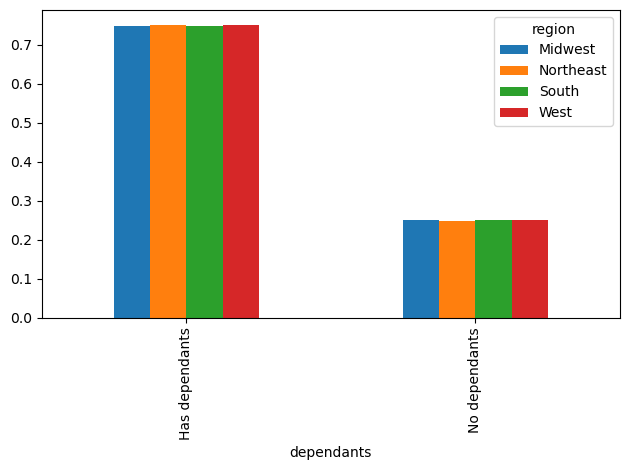

In [104]:
#Create a bar chart of dependants and region
bar_dependants_region = dependants_region_crosstab.plot.bar()
plt.tight_layout()

In [105]:
#Export bar
bar_dependants_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_region_bar.png'))

In [106]:
#Import department data
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [107]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [108]:
#Rename 'Unamed' as department_id
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [109]:
dept_dict = dict(zip(df_dep["department_id"], df_dep["department"]))

In [110]:
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [111]:
#Create column to add the department name to 'ords_prods_merge'
ords_prods_merge['department'] = ords_prods_merge['department_id'].map(dept_dict)

# Customer Profiles by department

Age profile by department

In [112]:
# Create a crosstab to compare age profile and department id
age_department_crosstab =  pd.crosstab(index = ords_prods_merge['department'], 
                                         columns = ords_prods_merge['age_profile'], 
                                         normalize = 'index')

In [113]:
age_department_crosstab

age_profile,middle-aged,senior,young
department,,,
alcohol,0.373575,0.253982,0.372443
babies,0.381296,0.258246,0.360458
bakery,0.376538,0.264001,0.359461
beverages,0.377972,0.265922,0.356106
breakfast,0.377487,0.261501,0.361012
bulk,0.370896,0.267318,0.361785
canned goods,0.373947,0.264441,0.361612
dairy eggs,0.374146,0.264175,0.361680
deli,0.376060,0.264084,0.359856


In [114]:
#Create a new crosstab to display department_id on x-axis
department_age_crosstab = pd.crosstab(index = ords_prods_merge['department'],
                                   columns = ords_prods_merge['age_profile'])

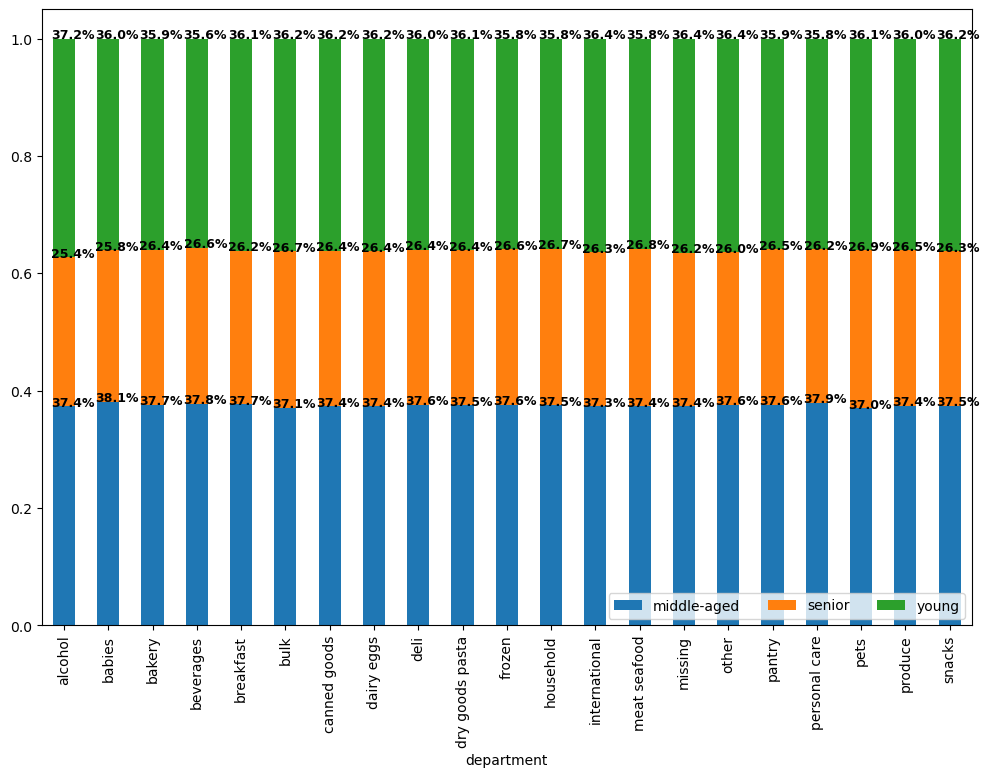

<Figure size 640x480 with 0 Axes>

In [115]:
#Create a bar chart of age profile and departments
bar_age_department = age_department_crosstab.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*department_age_crosstab.index.values]):
    for (proportion, y_loc) in zip(age_department_crosstab.loc[x],
                                   age_department_crosstab.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [116]:
#Export bar
bar_age_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_bar.png'))

Income profile by department

In [126]:
#Create a crosstab of profile and department id
income_department_crosstab =  pd.crosstab(index = ords_prods_merge['department'], 
                                         columns = ords_prods_merge['income_profile'], 
                                         normalize = 'index')

In [127]:
department_income_crosstab = pd.crosstab(index = ords_prods_merge['department'],
                                   columns = ords_prods_merge['income_profile'])

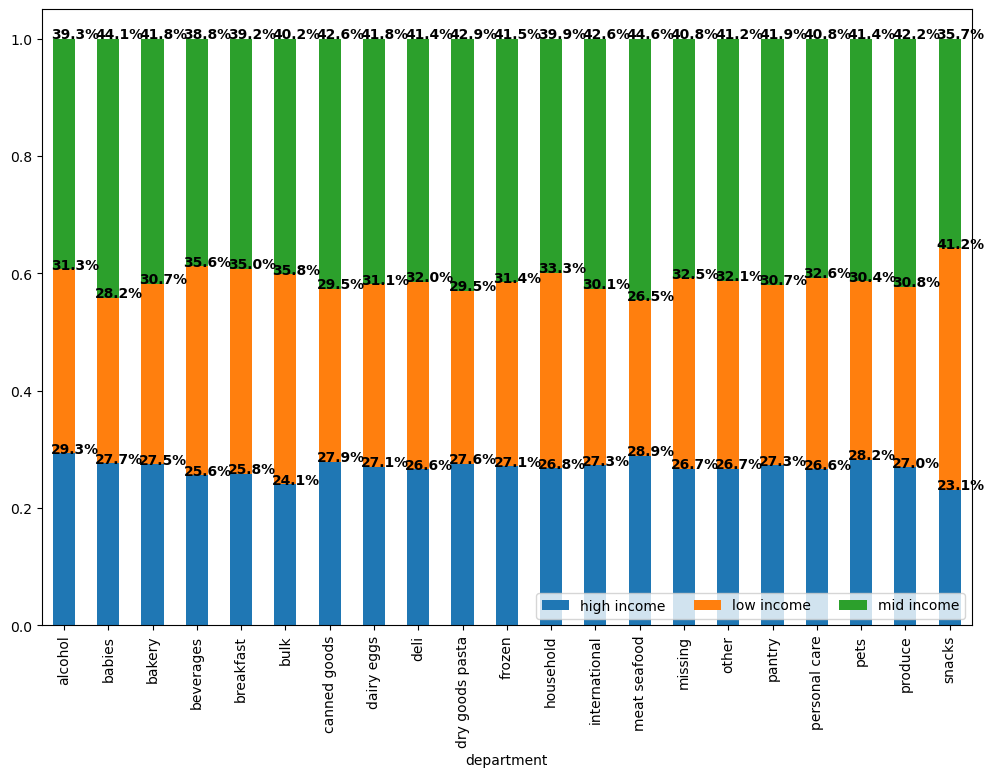

<Figure size 640x480 with 0 Axes>

In [128]:
#Create a bar chart to visualize the relation between income profile and departments

bar_income_department = income_department_crosstab.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*department_income_crosstab.index.values]):
    for (proportion, y_loc) in zip(income_department_crosstab.loc[x],
                                   income_department_crosstab.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [129]:
#Export bar
bar_income_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_bar.png'))

Diet profile by department

In [131]:
#Create a crosstab to compare diet profile and department
diet_department_crosstab =  pd.crosstab(index = ords_prods_merge['department'], 
                                         columns = ords_prods_merge['diet'], 
                                         normalize = 'index')

In [132]:
department_diet_crosstab = pd.crosstab(index = ords_prods_merge['department'],
                                   columns = ords_prods_merge['diet'])

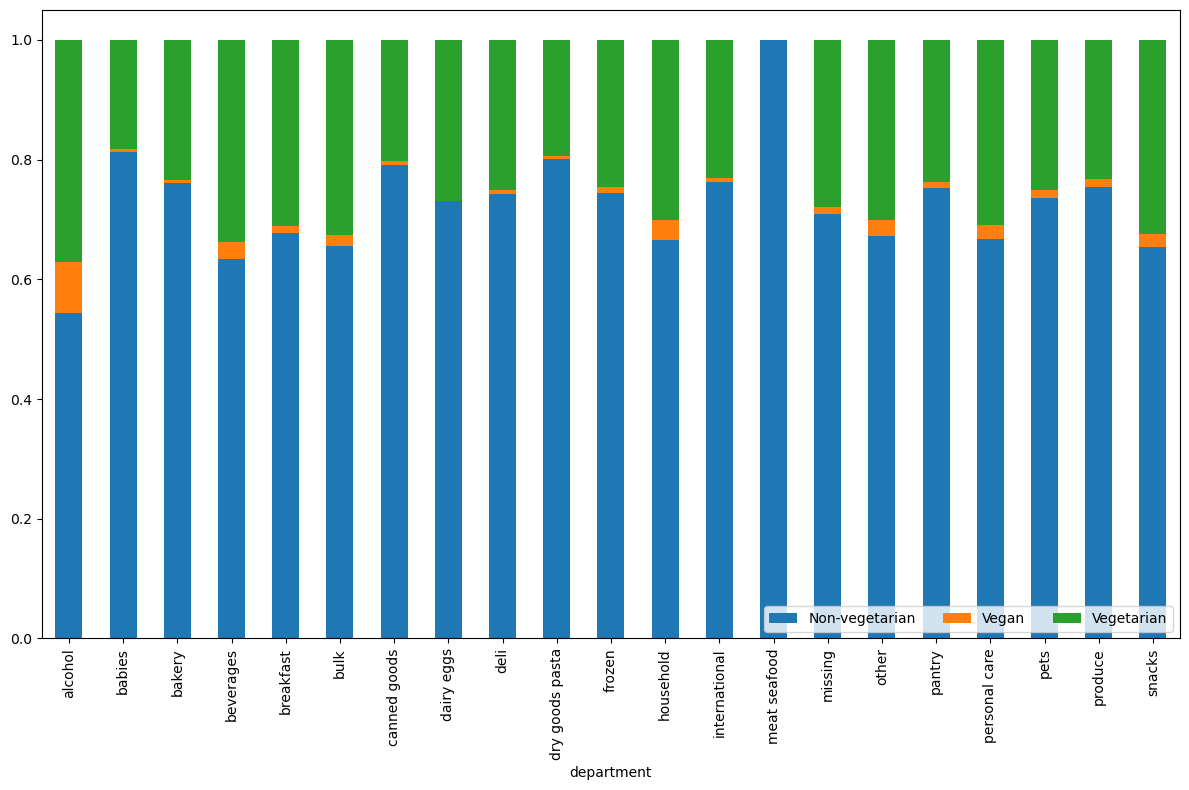

In [133]:
#Create a bar chart of diet profile and departments
bar_diet_department = diet_department_crosstab.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
plt.tight_layout()

In [134]:
#Export bar
bar_diet_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'diet_department_bar.png'))

Pet profile by department

In [135]:
#Create a crosstab to compare pet profile and department id
pet_department_crosstab =  pd.crosstab(index = ords_prods_merge['department'], 
                                         columns = ords_prods_merge['pet_status'], 
                                         normalize = 'index')

In [136]:
department_pet_crosstab = pd.crosstab(index = ords_prods_merge['department'],
                                   columns = ords_prods_merge['pet_status'])

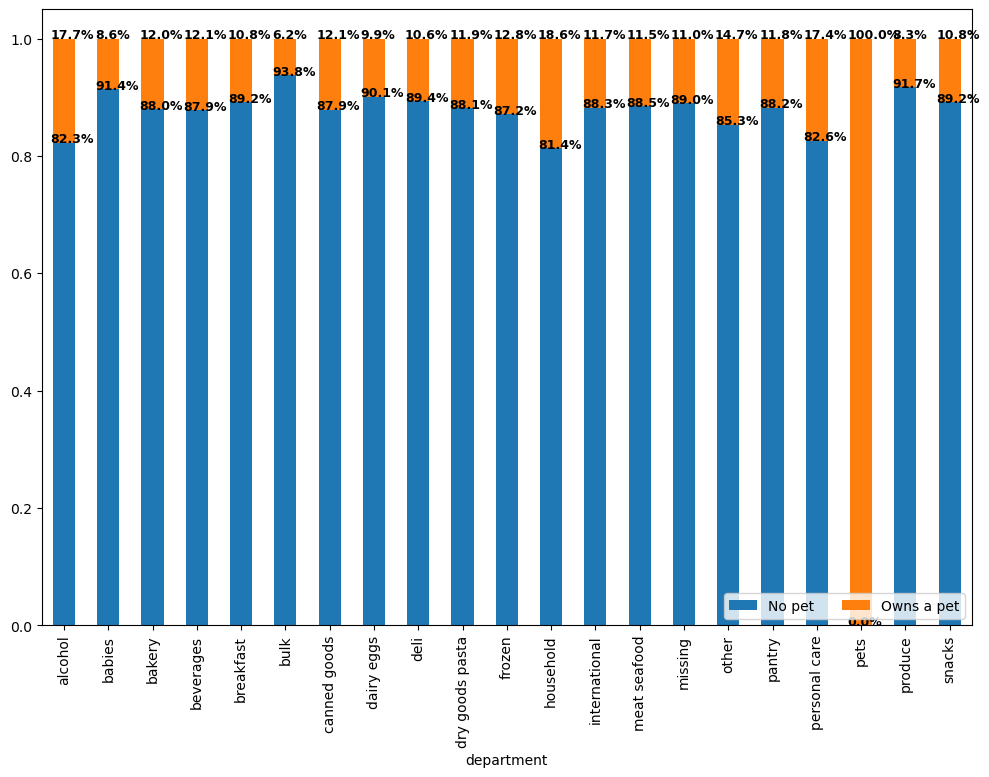

<Figure size 640x480 with 0 Axes>

In [137]:
#Create a bar chart of pet profile and departments
bar_pet_department = pet_department_crosstab.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*department_pet_crosstab.index.values]):
    for (proportion, y_loc) in zip(pet_department_crosstab.loc[x],
                                   pet_department_crosstab.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [138]:
#Export bar
bar_pet_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_department_bar.png'))

Dependants profile by department

In [139]:
# Create a crosstab to compare dependants profile and department id
dependants_department_crosstab =  pd.crosstab(index = ords_prods_merge['department'], 
                                         columns = ords_prods_merge['dependants'], 
                                         normalize = 'index')

In [140]:
department_dependants_crosstab = pd.crosstab(index = ords_prods_merge['department'],
                                   columns = ords_prods_merge['dependants'])

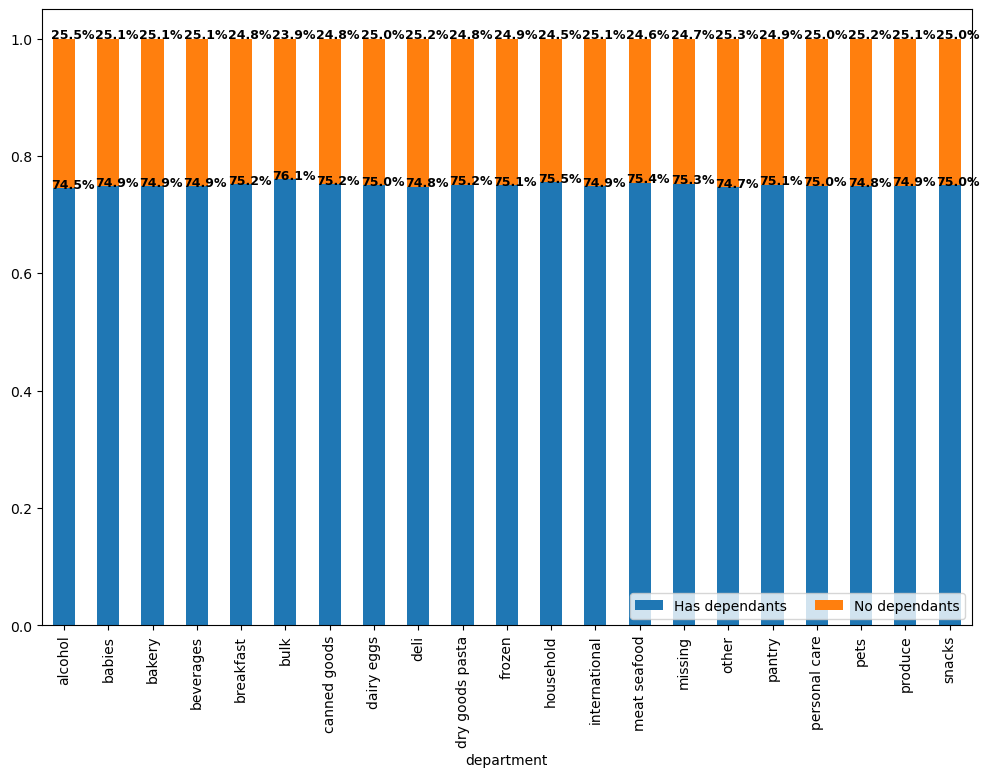

<Figure size 640x480 with 0 Axes>

In [141]:
#Create a bar chart of dependants profile and departments
bar_dependants_department = dependants_department_crosstab.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*department_dependants_crosstab.index.values]):
    for (proportion, y_loc) in zip(dependants_department_crosstab.loc[x],
                                   dependants_department_crosstab.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [142]:
#Export bar
bar_dependants_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_department_bar.png'))

# Answering other project questions

In [144]:
#ordering habits based on a customer's loyalty status
loyalty_department_crosstab =  pd.crosstab(index = ords_prods_merge['department'], 
                                         columns = ords_prods_merge['loyalty_flag'], 
                                         normalize = 'index')

In [145]:
department_loyalty_crosstab = pd.crosstab(index = ords_prods_merge['department'],
                                   columns = ords_prods_merge['loyalty_flag'])

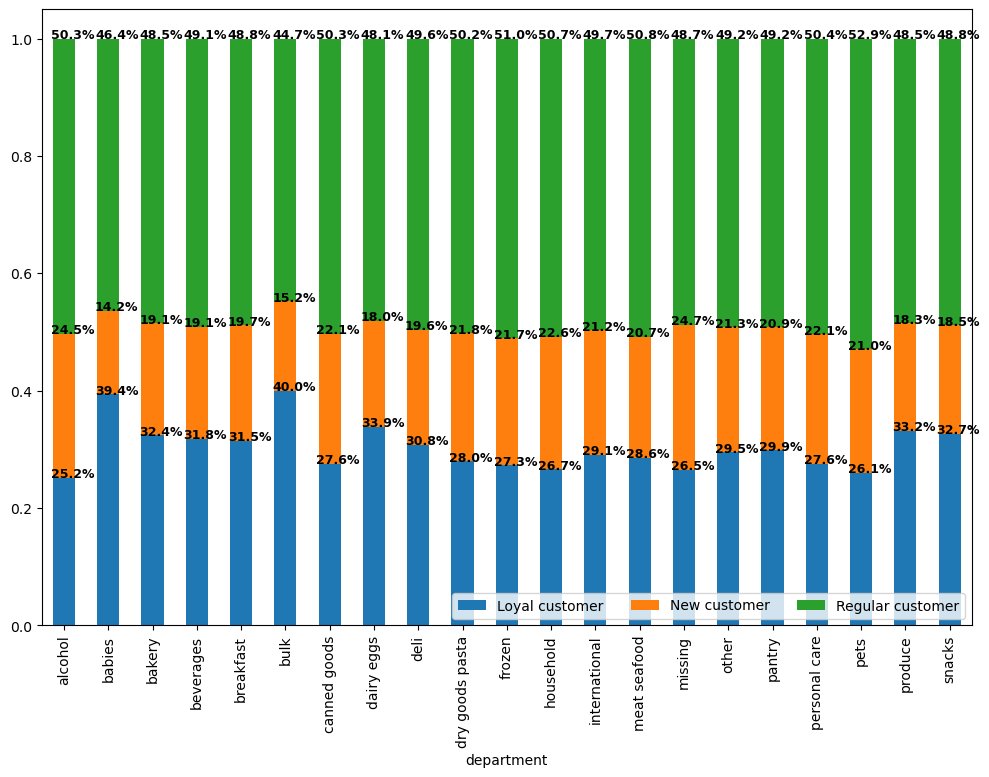

<Figure size 640x480 with 0 Axes>

In [146]:
#Create a bar chart of loyalty and departments

bar_loyalty_department = loyalty_department_crosstab.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*department_loyalty_crosstab.index.values]):
    for (proportion, y_loc) in zip(loyalty_department_crosstab.loc[x],
                                   loyalty_department_crosstab.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 9,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [147]:
#Export bar
bar_loyalty_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_department_bar.png'))

In [148]:
#ordering habits based on a customer’s region
region_department_crosstab =  pd.crosstab(index = ords_prods_merge['department'], 
                                         columns = ords_prods_merge['region'], 
                                         normalize = 'index')

In [149]:
department_region_crosstab = pd.crosstab(index = ords_prods_merge['department'],
                                   columns = ords_prods_merge['region'])

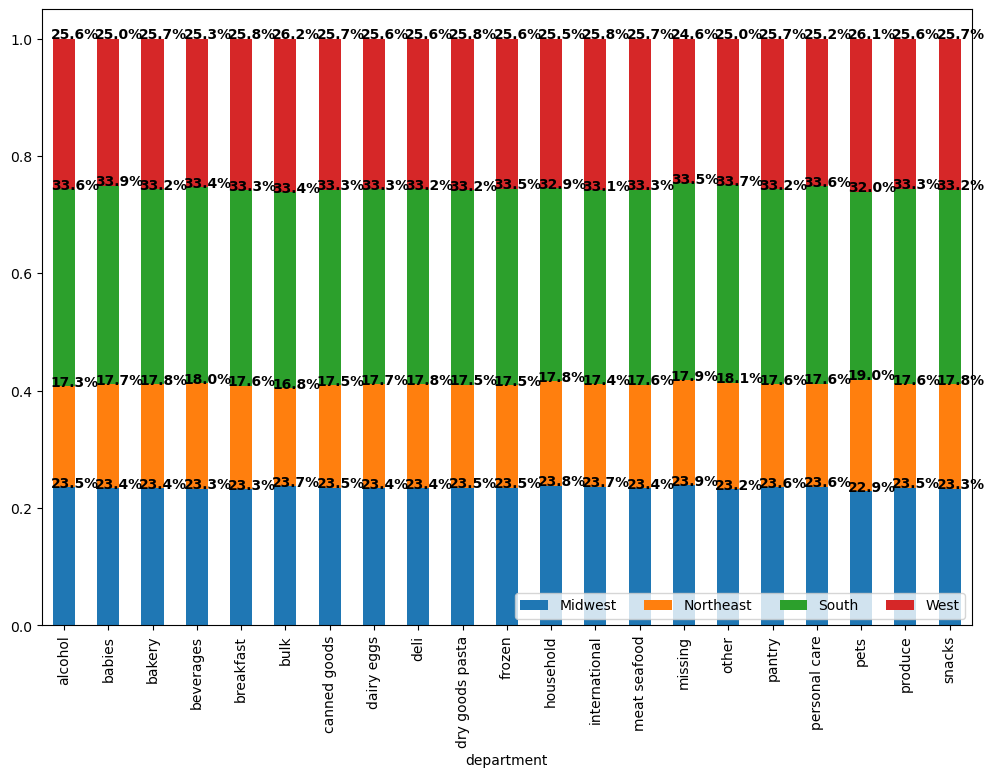

<Figure size 640x480 with 0 Axes>

In [150]:
#Create a bar chart of regions and departments
bar_region_department = region_department_crosstab.plot(kind = 'bar', stacked = True, figsize = (12,8))
plt.legend(loc = 'lower right', ncol = 4)
for n, x in enumerate([*department_region_crosstab.index.values]):
    for (proportion, y_loc) in zip(region_department_crosstab.loc[x],
                                   region_department_crosstab.loc[x].cumsum()):
    
        plt.text(x= n -0.30,
                 y= y_loc,
                 s= f'{np.round(proportion * 100, 1)}%',
                 color ='black',
                 fontsize = 10,
                 fontweight = 'bold')

plt.show()
plt.tight_layout()

In [151]:
#Export bar
bar_region_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_bar.png'))

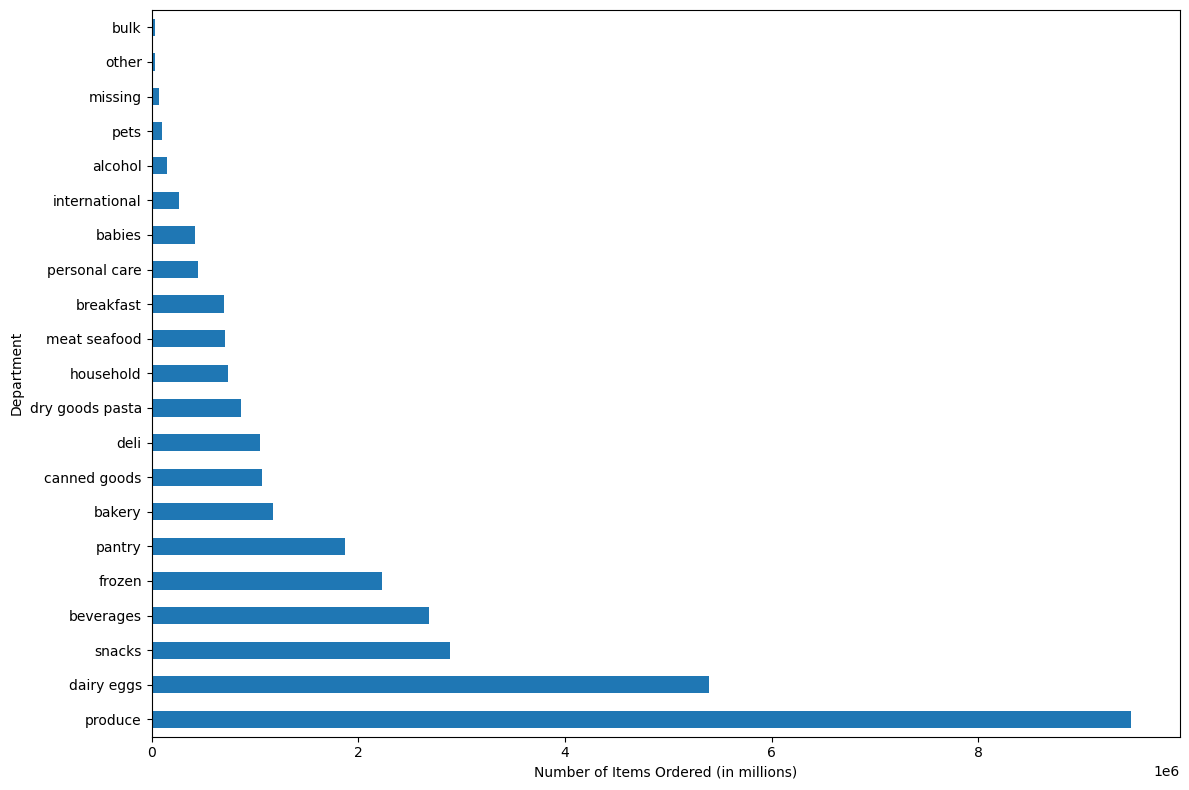

In [152]:
#products popularity
bar_department = ords_prods_merge['department'].value_counts().plot.barh(figsize = (12,8))
plt.xlabel('Number of Items Ordered (in millions)')
plt.ylabel('Department')
plt.tight_layout()

In [153]:
#Export bar
bar_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_bar.png'))

In [154]:
#Created a sample to dispaly the price range of products
df_sample = ords_prods_merge[:5000]

In [156]:
price_range_loc = df_sample.price_range_loc.fillna('High-range product')

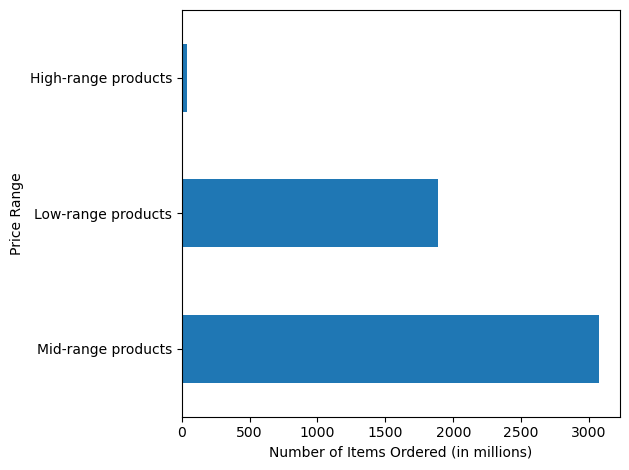

In [158]:
#Simpler price range groupings to help direct efforts
bar_price_range = df_sample['price_range_loc'].value_counts().plot.barh()
plt.xlabel('Number of Items Ordered (in millions)')
plt.ylabel('Price Range')
plt.tight_layout()

In [159]:
#Export bar
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_bar.png'))

In [160]:
#Export final data
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Instacart_final.pkl'))